In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [7]:
df_target_period1=pd.read_csv('target_period1.csv')
df_target_period2=pd.read_csv('target_period2.csv')
df_target_all_period=pd.read_csv('target_all_period.csv')

df_total_period1=pd.read_csv('total_period1.csv')
df_total_period2=pd.read_csv('total_period2.csv')
df_total_all_period=pd.read_csv('total_all_period.csv')


df_mention_period1=pd.read_csv('mentioned_period1.csv')
df_mention_period2=pd.read_csv('mentioned_period2.csv')
df_mention_all_period=pd.read_csv('mentioned_all_period.csv')


<Axes: xlabel='number_of_publications', ylabel='dist'>

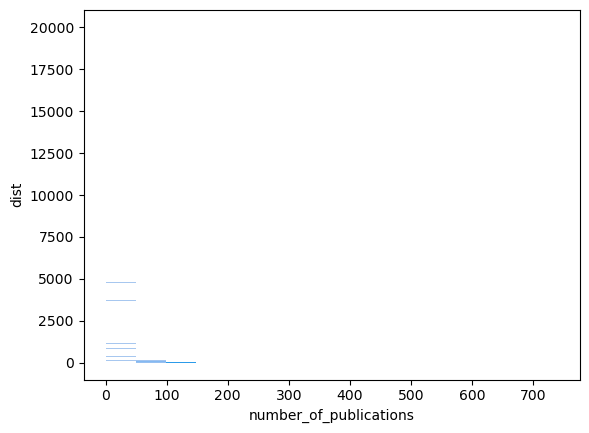

In [12]:
fig, ax=plt.subplots(nrows=1, ncols=1)
sns.histplot(, x='number_of_publications', y='dist')

In [91]:
def plot(df,ax, label):
    temp_df=df.dropna().groupby(['number_of_publications'])['dist'].sum().reset_index()
    temp_df['number_of_publications']=temp_df['number_of_publications'].astype(int)
    ax.scatter(temp_df['number_of_publications'], temp_df['dist'], marker='.', s=1, label=label)
    number=temp_df[temp_df['number_of_publications']>35*10]['dist'].sum()
    total=temp_df['dist'].sum()
    share=np.round(number/total*100,3)
    return np.max(temp_df['number_of_publications']),number,share 

(0.0, 0.2)

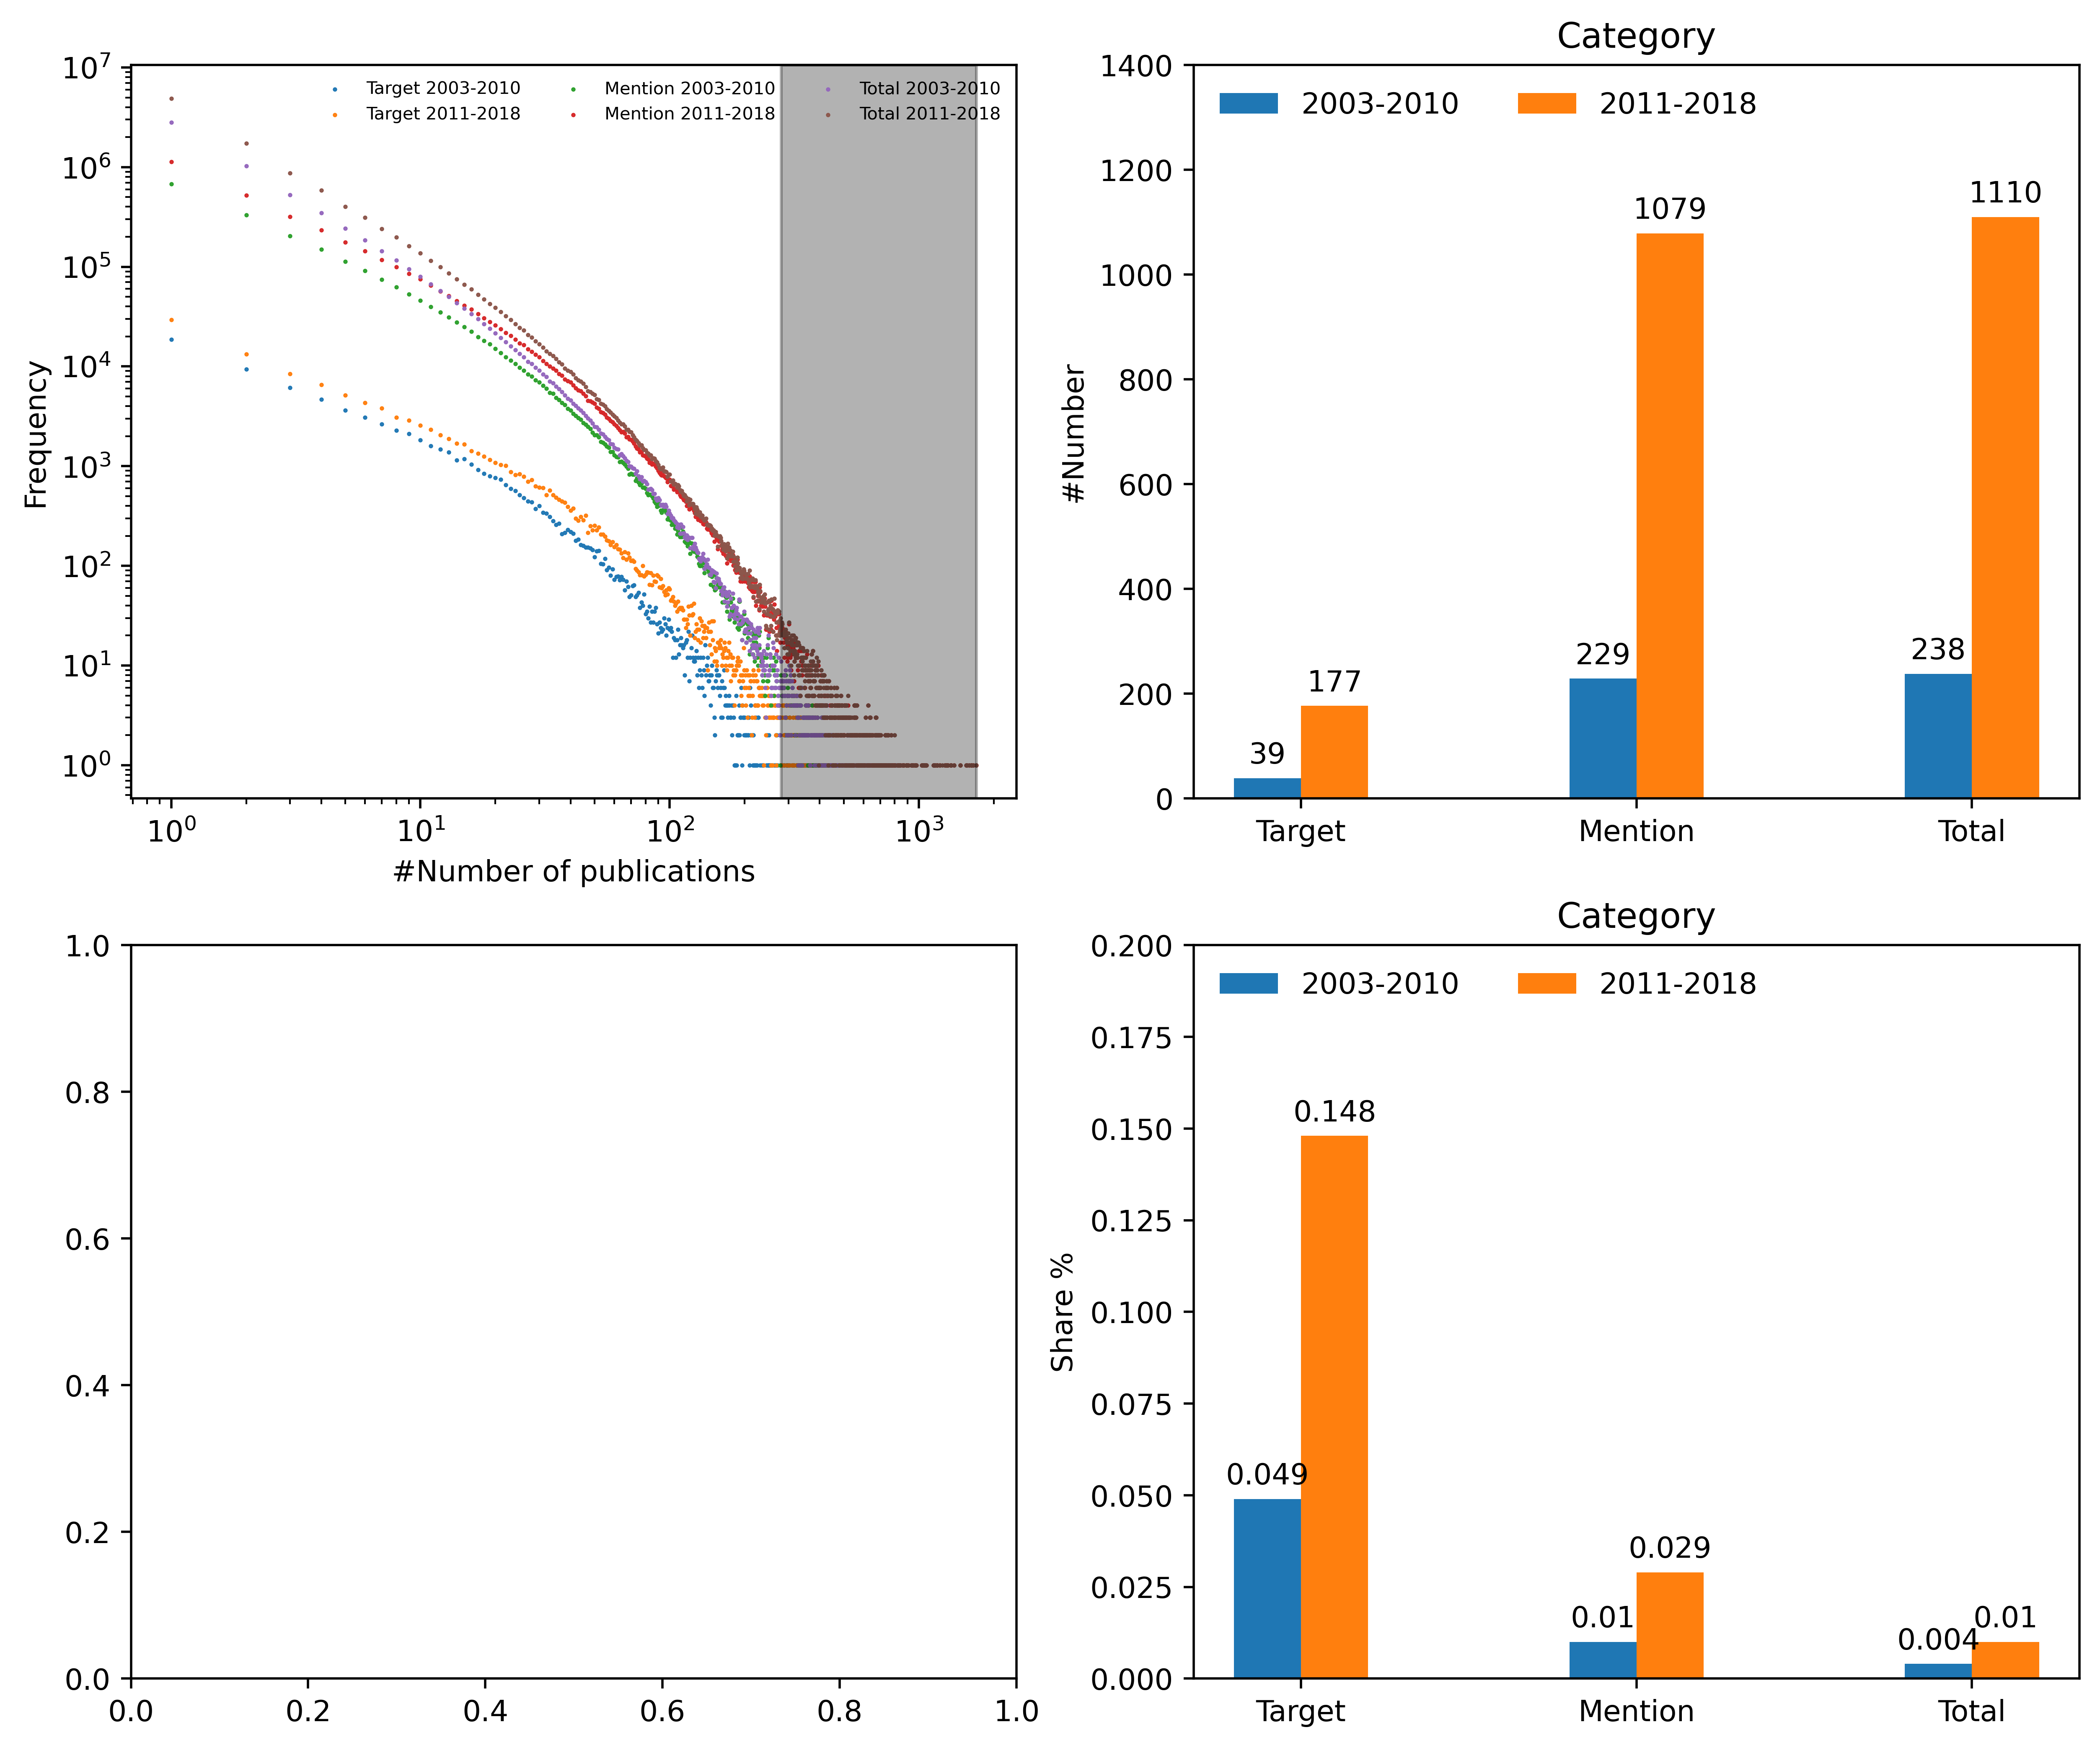

In [97]:
fig, ax=plt.subplots(nrows=2, ncols=2, dpi=500, figsize=(12, 10))
ax=ax.flat
_,number_target_1 ,share_target_1=plot(df_target_period1,ax[0], 'Target 2003-2010')
_,number_target_2,share_target_2=plot(df_target_period2,ax[0], 'Target 2011-2018')

_,number_mention_1, share_mention_1=plot(df_mention_period1,ax[0], 'Mention 2003-2010')
_,number_mention_2,share_mention_2=plot(df_mention_period2,ax[0], 'Mention 2011-2018')

_,number_total_1,share_total_1=plot(df_total_period1,ax[0], 'Total 2003-2010')
Max,number_total_2, share_total_2=plot(df_total_period2,ax[0], 'Total 2011-2018')



ax[0].set(yscale='log', xscale='log', ylabel='Frequency', xlabel='#Number of publications')
ax[0].axvspan(35*8, Max, alpha=0.3, color='k')
ax[0].legend(ncol=3, fontsize=6, frameon=False, loc='upper right')



category = ("Target", "Mention", "Total")
numbers = {
    '2003-2010': (number_target_1, number_mention_1, number_total_1),
    '2011-2018': (number_target_2, number_mention_2, number_total_2),
}

x = np.arange(len(category))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0.5


for attribute, measurement in numbers.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, measurement, width, label=attribute)
    ax[1].bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('#Number')
ax[1].set_title('Category')
ax[1].set_xticks(x + width, category)
ax[1].legend(loc='upper left', ncols=3, frameon=False)
ax[1].set_ylim(0, 1400)







category = ("Target", "Mention", "Total")
numbers = {
    '2003-2010': (share_target_1, share_mention_1, share_total_1),
    '2011-2018': (share_target_2, share_mention_2, share_total_2),
}

x = np.arange(len(category))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0.5


for attribute, measurement in numbers.items():
    offset = width * multiplier
    rects = ax[3].bar(x + offset, measurement, width, label=attribute)
    ax[3].bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[3].set_ylabel('Share %')
ax[3].set_title('Category')
ax[3].set_xticks(x + width, category)
ax[3].legend(loc='upper left', ncols=3, frameon=False)
ax[3].set_ylim(0, 0.2)

In [105]:
def get_dist(df):
    return df[df['number_of_publications']>35*8].groupby(['latest_affiliation_country'])['dist'].sum().reset_index().sort_values(by='dist', ascending=False)

In [106]:
get_dist(df_target_period1)

,latest_affiliation_country,dist
23,usa,15
4,deu,6
8,fra,6
9,gbr,6
16,nld,5
1,can,5
3,chn,4
12,hkg,3
6,esp,3
7,fin,3


In [107]:
get_dist(df_target_period2)

,latest_affiliation_country,dist
35,usa,51
11,fra,30
8,deu,21
9,esp,21
24,nld,19
13,gbr,19
5,can,14
0,aus,12
17,irn,12
7,chn,12
